In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage as ski
from skimage import data
from skimage.color import rgb2gray
from scipy.stats import gaussian_kde
from itertools import accumulate
import cv2

[ 6 10]


<BarContainer object of 2 artists>

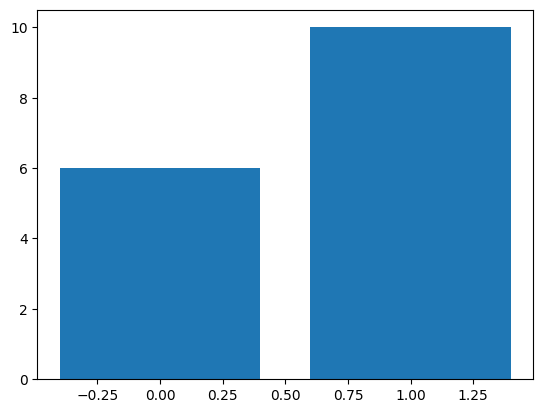

In [2]:
im1 = np.array([[0, 1, 1, 1],
                [1, 0, 1, 1],
                [1, 1, 1, 1],
                [0, 0, 0, 0]])
pixels = im1.reshape((16))
bins = np.bincount(pixels)
print(bins)
plt.bar(range(2), bins)

In [3]:
img = data.cat()
im = rgb2gray(img)
im.max(), im.min()

(np.float64(0.7556109803921569), np.float64(0.015120784313725492))

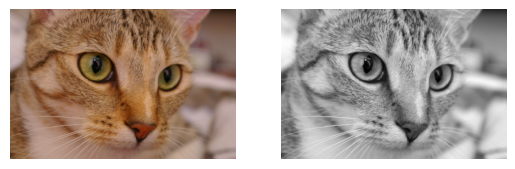

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

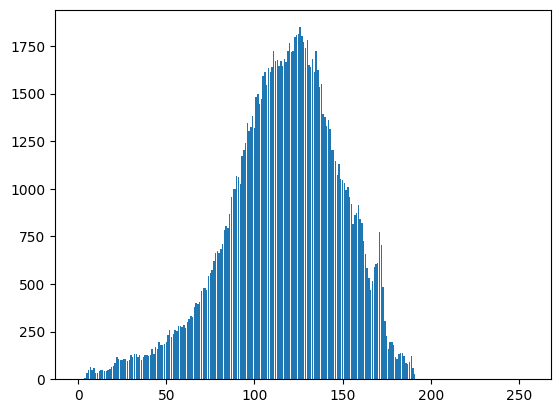

In [5]:
n = 256
pixels = (im.flatten() * 255).astype(int)
bins = np.bincount(pixels, minlength=n)
plt.bar(range(256), bins)
plt.show()

In [6]:
rows, cols = im.shape
numpixels = rows * cols
normbins = bins / numpixels
np.sum(normbins)

np.float64(1.0)

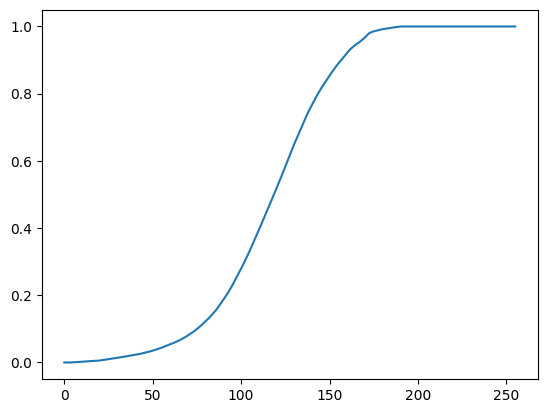

In [7]:
acc = list(accumulate(normbins))
plt.plot(range(256), acc)
plt.show()

In [8]:
def equalizeHistogram(img):
    row, col = img.shape
    hist = np.bincount((img.flatten()).astype(int), minlength=256)
    hist = hist/(row*col) # normalize hist
    accum = list(accumulate(hist))

    out = np.zeros((row, col))

    for i in range(row):
        for j in range(col):
            out[i, j] = accum[int(img[i, j])]

    out = np.floor(255*out + 0.5)
    return out

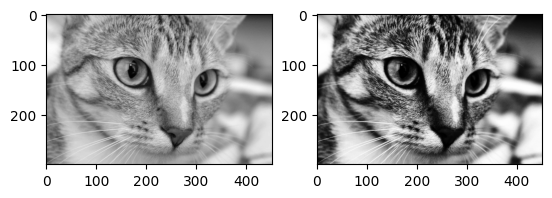

In [9]:
eqim = equalizeHistogram(im*255)
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(eqim, cmap='gray')

256


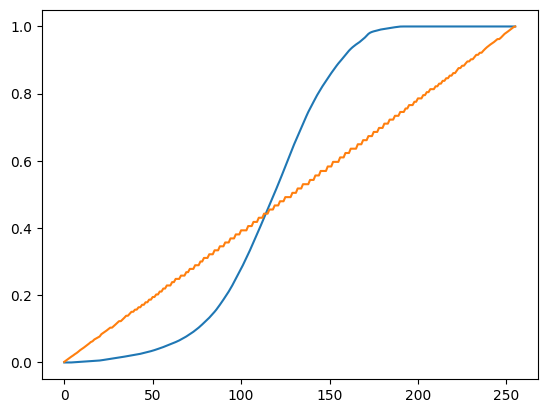

In [10]:
acc = list(accumulate(normbins))

eqpixels = (eqim.flatten()).astype(int)
eqbins = np.bincount(eqpixels, minlength=n)
eqnormbins = eqbins / numpixels
eqacc = list(accumulate(eqnormbins))
print(len(eqbins))

plt.plot(range(256), acc)
plt.plot(range(256), eqacc)
plt.show()

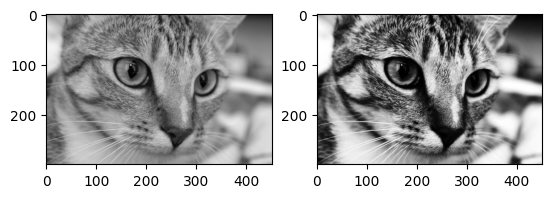

In [43]:
im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eqim = cv2.equalizeHist(im)
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(eqim, cmap='gray')

0 255


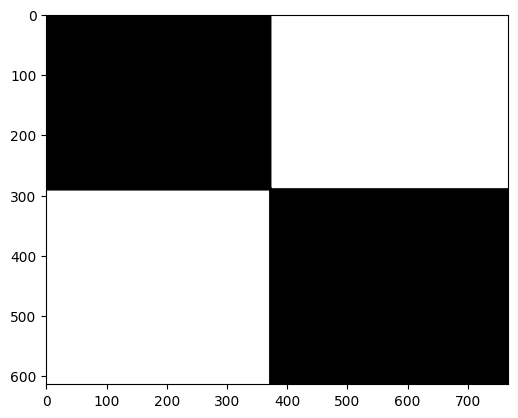

In [44]:
img3 = ski.io.imread('SecretMessage.bmp')
print(img3.min(), img3.max())
plt.imshow(img3)

In [16]:
im3 = im3[:,:,0]

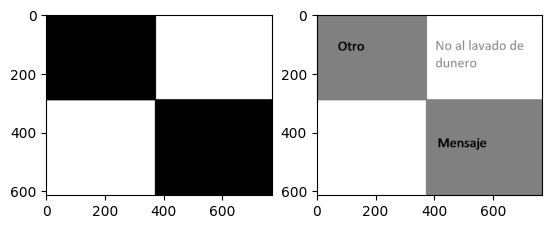

In [21]:
eqim = equalizeHistogram(im3)

plt.subplot(121)
plt.imshow(im3, cmap='gray')
plt.subplot(122)
plt.imshow(eqim, cmap='gray')
plt.show()

In [22]:
pixels = (im3.flatten()).astype(int)
bins = np.bincount(pixels, minlength=n)
print(bins)

[  3167 235750      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

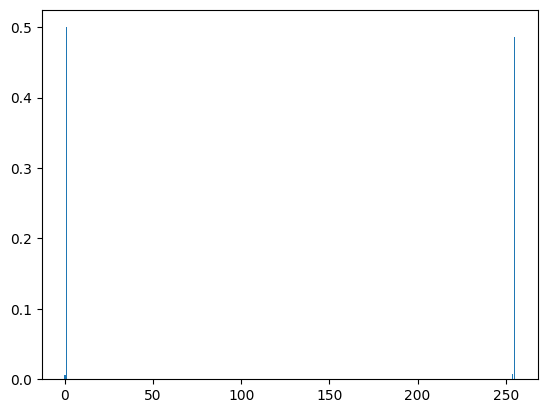

In [23]:
rows, cols = im3.shape
numpixels = rows * cols
normbins = bins / numpixels
plt.bar(range(256), normbins)
plt.show()

In [35]:
normbins = bins / numpixels
acc = np.array(list(accumulate(normbins)))

In [36]:
eqpixels = (eqim.flatten()).astype(int)
eqbins = np.bincount(eqpixels, minlength=n)
eqnormbins = eqbins / numpixels
eqacc = np.array(list(accumulate(eqnormbins)))

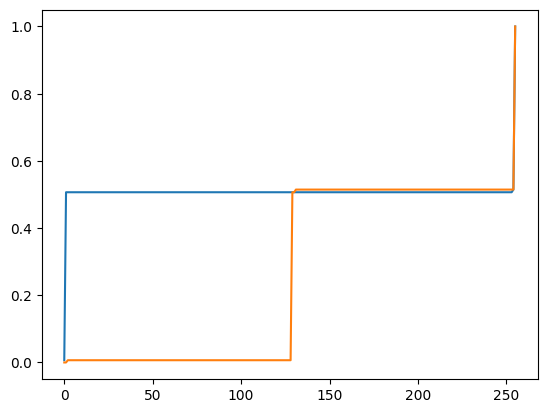

In [37]:
plt.plot(range(256), acc)
plt.plot(range(256), eqacc)
plt.show()

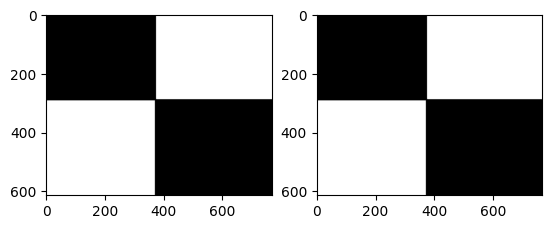

In [46]:
im = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
eqim = cv2.equalizeHist(im)
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(eqim, cmap='gray')
plt.show()